In [1]:
import numpy as np
import pandas as pd

In [2]:
import bokeh as bk
from bokeh.io import output_notebook,show,gridplot
output_notebook()

Loading BokehJS ... 
 
 Warning: Requesting CDN BokehJS version '0.11.1dev7' from Bokeh development version '0.11.1dev7-dirty'. This configuration is unsupported and may not work!

In [3]:
print np.__version__
print pd.__version__
print bk.__version__
print bk.__file__

1.10.2
0.17.1
0.11.1dev7-dirty
/home/chbrandt/fido/pynotes/photoz_bokeh/issue_3774/bokeh/bokeh/__init__.pyc


In [4]:
np.random.seed(1234509876)
signal = np.random.normal(0.5,0.1,900) 
instr = np.random.poisson(0.5,100)
sample = np.concatenate((signal,instr[instr>0]),axis=0)
np.random.shuffle(sample)
df = pd.DataFrame({'sample':sample})
df.describe()

,sample
count,943.000000
mean,0.535862
std,0.211561
min,0.167255
25%,0.441506
50%,0.506249
75%,0.575700
max,3.000000


In [5]:
from bokeh.charts import Histogram
p = Histogram(df,'sample')
show(p)

In [6]:
nbins = 10
bins = np.linspace(0,1,nbins)
df['bins'] = pd.cut(df['sample'],bins)
df['quantil'] = pd.qcut(df['sample'],nbins)
print df.describe(include='all')

hnan = df.isnull().any().values
nnan = df.isnull().sum().values
_f = '{:<10}\t{}\t{:>10}'
#print _f.format('\n','Has NaN?','How many?')
#for i,col in enumerate(df.columns):
#    print _f.format(col,hnan[i],nnan[i])

            sample            bins     quantil
count   943.000000             933         943
unique         NaN               8          10
top            NaN  (0.444, 0.556]  (0.664, 3]
freq           NaN             397          95
mean      0.535862             NaN         NaN
std       0.211561             NaN         NaN
min       0.167255             NaN         NaN
25%       0.441506             NaN         NaN
50%       0.506249             NaN         NaN
75%       0.575700             NaN         NaN
max       3.000000             NaN         NaN


In [7]:
print df.groupby('bins').describe()

                          sample
bins                            
(0, 0.111]     count    0.000000
               mean          NaN
               std           NaN
               min           NaN
               25%           NaN
               50%           NaN
               75%           NaN
               max           NaN
(0.111, 0.222] count    2.000000
               mean     0.180787
               std      0.019136
               min      0.167255
               25%      0.174021
               50%      0.180787
               75%      0.187552
               max      0.194318
(0.222, 0.333] count   35.000000
               mean     0.295076
               std      0.023906
               min      0.223564
               25%      0.284188
               50%      0.293745
               75%      0.310848
               max      0.332206
(0.333, 0.444] count  206.000000
               mean     0.399358
               std      0.030983
               min      0.334101
          

In [8]:
from bokeh.charts import BoxPlot
p = BoxPlot(df,values='sample',label='quantil')
show(p)

In [9]:
brandt = None

In [10]:
import matplotlib.pyplot as plt

ret1 = df.boxplot(column='sample',by='bins',grid=False)
plt.ylim([0,1.1])
plt.xticks(rotation=90)

fig1 = plt.gcf()

from bokeh import mpl
show(mpl.to_bokeh())

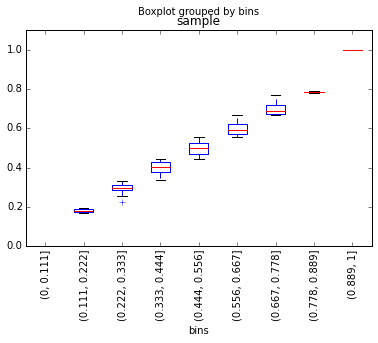

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

ret2 = df.boxplot(column='sample',by='bins',grid=False)
plt.ylim([0,1.1])
plt.xticks(rotation=90)

fig2 = plt.gcf()

plt.show()

In [12]:
import seaborn as sns
print sns.__version__
from bokeh import mpl
from bokeh.io import output_notebook, show

output_notebook()
iris = sns.load_dataset("iris")
sns.violinplot(iris.species,iris.sepal_length)
show(mpl.to_bokeh())

0.7.0


Loading BokehJS ... 
 
 Warning: Requesting CDN BokehJS version '0.11.1dev7' from Bokeh development version '0.11.1dev7-dirty'. This configuration is unsupported and may not work!

/home/chbrandt/.conda/envs/bokeh_devel/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [13]:
from bokeh.plotting import output_file, show
from bokeh.sampledata.iris import flowers
import matplotlib
matplotlib.use('TKAgg')
from bokeh import mpl

flowers.boxplot(column='sepal_length', by='species')
show(mpl.to_bokeh())

/home/chbrandt/.conda/envs/bokeh_devel/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [14]:
#print iris.groupby('species').describe()
#print flowers.groupby('species').describe()
(flowers == iris).all()

sepal_length    True
sepal_width     True
petal_length    True
petal_width     True
species         True
dtype: bool